# Warsztat 10 – Pandas - analiza statystyczna i wizualizacja<a id=top></a>

<font size=2>Przed pracą z notatnikiem polecam wykonać kod w ostatniej komórce (zawiera html i css), dzięki czemu całość będzie bardziej estetyczna :)</font>

<a href='#Warsztat-10-–-Pandas---analiza-statystyczna-i-wizualizacja'>Warsztat 10</a>
<ul>
<li><a href='#Indeksowanie-i-filtrowanie'><span>Indeksowanie i filtrowanie</span></a></li>
<li><a href='#Grupowanie-danych'><span>Grupowanie danych</span></a></li>
<li><a href='#Podstawowe-analizy'><span>Podstawowe analizy</span></a></li>
<li><a href='#'><span></span></a></li>
<li><a href='#Materiały-do-dalszej-nauki'><span>Materiały do dalszej nauki</span></a></li>
</ul>

Poprzedni notatnik zawierał podstawowe informacje o tym, jak wczytać dane, dokonać inspekcji surowych danych (zarówno wartości zmiennych oraz ich prostej wizualizacji) oraz wyczyścić z niepotrzebnych wartości (przede wszystkim braków danych).  
Teraz wprowadzimy bardziej zaawansowane funkcje pakietu pandas, które pozwolą na filtrowanie, grupowanie i przekształcanie danych.  
Następnie przeprowadzimy kilka analiz statystycznych w samym pythonie oraz zobaczymy w jaki sposób włączyć do procesu analizy w R.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Będzie nam potrzebny bardziej złożony zbiór danych, więc rozbudujemy przykład ze wzrostem.

In [2]:
dane = pd.read_excel("./wzrost_multi.xlsx", parse_cols=[1,2,3])
dane.head()

,Płeć,Pochodzenie,Wzrost
0,Mężczyzna,Hollywood,174
1,Mężczyzna,Hollywood,170
2,Mężczyzna,Hollywood,177
3,Mężczyzna,Hollywood,177
4,Mężczyzna,Hollywood,178


Nasza ramka z danymi ma trzy kolumny: płeć ankietowanego, pochodzenie - miejsce zamieszkania, wzrost wyrażony w centymetrach.  
Spójrzmy, jakie wartości w naszym zbiorze przyjmują zmienne kategorialne.

In [3]:
dane.Płeć.value_counts()

Kobieta      60
Mężczyzna    60
Name: Płeć, dtype: int64

In [4]:
dane.Pochodzenie.value_counts()

Hollywood    60
Polska       60
Name: Pochodzenie, dtype: int64

Do danych liczbowych lepiej użyć metody describe(), która poda nam znacznie więcej szczegółów.

In [5]:
dane.Wzrost.describe()

count    120.000000
mean     173.691667
std       10.220918
min      148.000000
25%      167.000000
50%      174.000000
75%      180.000000
max      206.000000
Name: Wzrost, dtype: float64

Mamy teraz podstawową wiedzę o zawartości naszych danych, jednak te dane wydają się zbyt ogólne. W końcu nie interesują nas tak bardzo informacje na temat zbioru całej naszej próby, ale raczej poszczególnych podgrup, np. kobiet z Hollywood. Musimy zatem pogrupować nasze dane tak, by te informacje wydobyć.

<a href='#top' style='float: right; font-size: 13px;'>Do początku</a>

## Indeksowanie i filtrowanie

Nie zawsze interesuje nas cały zbiór danych, tylko jakaś jedna jego część. Pandas oferuje szeroki wachlarz sposobów do wyboru podzbiorów.

Bardzo dobrym podejściem do analizy danych jest utrzymywanie **"uporządkowanych" zbiorów danych** (ang. tidy data). Oznacza to, że każda kolumna zawiera inną zmienną, natomiast każdy wiersz zawiera pojedynczą obserwację.  
Nasze dane spełniają ten warunek. Dzięki temu, możemy swobodnie wybierać z nich tylko niektóre kolumny przy ciągłym zachowaniu spójności. Możemy to zrobić na kilka sposobów. Pierwszy polega na użyciu nawiasów kwadratowych, w które wpiszemy po prostu nazwy interesujących nas zmiennych.

In [7]:
dane['Wzrost'].head()

0    174
1    170
2    177
3    177
4    178
Name: Wzrost, dtype: int64

Wybierając tylko jedną kolumnę zawsze otrzymamy **serię**, czyli jednowymiarowy typ danych pandas (w odróżnieniu od ramki z danymi, która jest dwuwymiarowa). Ramkę tworzy wiele takich serii.  
Jeśli chcemy tą metodą wybrać więcej kolumn, musimy przekazać ich listę.

In [12]:
dane[['Pochodzenie','Płeć']].head()

,Pochodzenie,Płeć
0,Hollywood,Mężczyzna
1,Hollywood,Mężczyzna
2,Hollywood,Mężczyzna
3,Hollywood,Mężczyzna
4,Hollywood,Mężczyzna


Innym sposobem wybrania pojedynczej kolumny może być użycie jej nazwy jako metody samego zbioru.  
Choć on nie będzie działał we wszystkich przypadkach (np. kiedy nazwa kolumny posiada spację lub inny znak specjalny).

In [14]:
dane.Wzrost.head()

0    174
1    170
2    177
3    177
4    178
Name: Wzrost, dtype: int64

Bardziej ogólnym i uniwersalnym sposobem wyboru kolumn jest użycie metody <b>.loc[ , ]</b>.  
Do nawiasu kwadratowego zawsze podajemy dwie wartości, pierwsza oznacza wiersz (lub zakres wierszy), które chcemy wybrać. Druga oznacza to samo dla kolumn. Jeśli chcemy wybrać wszystkie elementy, możemy użyć znaku **dwukropka**.

Spróbujmy najpierw odtworzyć wybór kolumn z wcześniej.

In [18]:
dane.loc[:,'Wzrost'].head()

0    174
1    170
2    177
3    177
4    178
Name: Wzrost, dtype: int64

In [19]:
dane.loc[:,['Pochodzenie', 'Płeć']].head()

,Pochodzenie,Płeć
0,Hollywood,Mężczyzna
1,Hollywood,Mężczyzna
2,Hollywood,Mężczyzna
3,Hollywood,Mężczyzna
4,Hollywood,Mężczyzna


Teraz spróbujmy wybrać kilka różnych wierszy.

In [20]:
dane.loc[5,:]

Płeć           Mężczyzna
Pochodzenie    Hollywood
Wzrost               189
Name: 5, dtype: object

In [21]:
dane.loc[5:10,:]

,Płeć,Pochodzenie,Wzrost
5,Mężczyzna,Hollywood,189
6,Mężczyzna,Hollywood,183
7,Mężczyzna,Hollywood,183
8,Mężczyzna,Hollywood,193
9,Mężczyzna,Hollywood,182
10,Mężczyzna,Hollywood,185


**Ważne**: Metoda loc operuje na <b>nazwach</b> zarówno indeksów wierszy jak i nazw kolumn. Nasze dane mają nazwy indeksów w formie numerów, dlatego może to powodować lekką konfuzję. Metoda loc traktuje te numery jako nazwy wierszy a nie ich liczbę porządkową.

Teraz jeszcze jeden przykład z kombinacją indeksów i nazw kolumn. Warto zwrócić uwagę, że kolejność wpisanych kolumn jest dowolna i możemy je tym sposobem przestawiać.

In [23]:
dane.loc[7:13,['Wzrost','Pochodzenie']]

,Wzrost,Pochodzenie
7,183,Hollywood
8,193,Hollywood
9,182,Hollywood
10,185,Hollywood
11,175,Hollywood
12,183,Hollywood
13,178,Hollywood


Pandas udostępnia też możliwość wykorzystania indeksowania numerycznego - czyli wskazania numerów wierszy i kolumn, które chcemy wybrać do podzbioru bezpośrednio. Służy do tego metoda <b>.iloc[ , ]</b>. Jej działanie jest identyczne do loc, z tym wyjątkiem, że posługujemy się numerami a nie nazwami.

In [25]:
dane.iloc[6:10,0]

6    Mężczyzna
7    Mężczyzna
8    Mężczyzna
9    Mężczyzna
Name: Płeć, dtype: object

In [27]:
dane.iloc[6:10,1:3]

,Pochodzenie,Wzrost
6,Hollywood,183
7,Hollywood,183
8,Hollywood,193
9,Hollywood,182


Działa tutaj ten sam system wskazywania zakresów liczbowych jak w całym pythonie - pierwszym elementem jest 0, natomiast koniec zakresu nie jest uwzględniany w nowym podzbiorze. Dlatego loc[8:10,:] i iloc[8:10,:] dadzą inne wyniki.

In [28]:
dane.loc[8:10,:]

,Płeć,Pochodzenie,Wzrost
8,Mężczyzna,Hollywood,193
9,Mężczyzna,Hollywood,182
10,Mężczyzna,Hollywood,185


In [29]:
dane.iloc[8:10,:]

,Płeć,Pochodzenie,Wzrost
8,Mężczyzna,Hollywood,193
9,Mężczyzna,Hollywood,182


Etykiety zachowują się tu całkiem podobnie do zakresów liczbowych - możemy wybrać od której do której nazwy kolumny chcemy wybrać podzbiór i pandas wybierze dla nas wskazane kolumny i wszystkie, które znajdują się pomiędzy nimi.

In [33]:
dane.loc[8:10,'Płeć':'Pochodzenie']

,Płeć,Pochodzenie
8,Mężczyzna,Hollywood
9,Mężczyzna,Hollywood
10,Mężczyzna,Hollywood


Podobnie jak przy filtrowaniu elementów listy, możemy tutaj dołożyć trzeci argument, który wskaże wielkość kroku - np. wybieranie co drugiego czy co trzeciego elementu.

In [34]:
dane.loc[5:25:4,:]

,Płeć,Pochodzenie,Wzrost
5,Mężczyzna,Hollywood,189
9,Mężczyzna,Hollywood,182
13,Mężczyzna,Hollywood,178
17,Mężczyzna,Hollywood,178
21,Mężczyzna,Hollywood,180
25,Mężczyzna,Hollywood,193


Część pierwsza zawierała już przykłady wybierania elementów kolumn na podstawie warunków logicznych.  
Tutaj jednak powtórzymy to sobie i poszerzymy trochę tamte wiadomości.

Możemy dowolnie wybierać podzbiory kolumn czy wierszy na podstawie wartości zawartych w poszczególnych komórkach.  
Dla przykładu, możemy chcieć wybrać podzbiór składający się wyłącznie z danych kobiet. W tym celu musimy przefiltrować kolumnę płeć.

In [38]:
dane['Płeć'] == 'Kobieta'

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
90      True
91      True
92      True
93      True
94      True
95      True
96      True
97      True
98      True
99      True
100     True
101     True
102     True
103     True
104     True
105     True
106     True
107     True
108     True
109     True
110     True
111     True
112     True
113     True
114     True
115     True
116     True
117     True
118     True
119     True
Name: Płeć, dtype: bool

Otrzymujemy serię wartości boolowskich, które identyfikują czy w danej komórce wartość płci jest równa kobiecie. Teraz możemy użyć tych danych, żeby wyświetlić tylko te wiersze, dla których jest to prawda. Możemy tej maski użyć zamiast wartości dla wierszy w metodzie loc.

In [41]:
dane.loc[dane['Płeć'] == 'Kobieta',:]

,Płeć,Pochodzenie,Wzrost
30,Kobieta,Hollywood,168
31,Kobieta,Hollywood,157
32,Kobieta,Hollywood,160
33,Kobieta,Hollywood,177
34,Kobieta,Hollywood,169
35,Kobieta,Hollywood,174
36,Kobieta,Hollywood,175
37,Kobieta,Hollywood,168
38,Kobieta,Hollywood,169
39,Kobieta,Hollywood,171


W identyczny sposób możemy wybrać np. wszystkie obserwacje, w których mężczyźni mają poniżej 175 cm wzrostu.  
Najpierw stworzymy zmienną zawierającą naszą maskę z wartościami boolowskimi, a potem użyjemy jej do odfiltrowania danych.

In [46]:
maska = (dane['Płeć'] == 'Mężczyzna') & (dane['Wzrost'] < 175)
maska

0       True
1       True
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28      True
29     False
       ...  
90     False
91     False
92     False
93     False
94     False
95     False
96     False
97     False
98     False
99     False
100    False
101    False
102    False
103    False
104    False
105    False
106    False
107    False
108    False
109    False
110    False
111    False
112    False
113    False
114    False
115    False
116    False
117    False
118    False
119    False
dtype: bool

In [47]:
dane.loc[maska,:]

,Płeć,Pochodzenie,Wzrost
0,Mężczyzna,Hollywood,174
1,Mężczyzna,Hollywood,170
28,Mężczyzna,Hollywood,170
63,Mężczyzna,Polska,164
64,Mężczyzna,Polska,172
67,Mężczyzna,Polska,169
70,Mężczyzna,Polska,159
71,Mężczyzna,Polska,166
72,Mężczyzna,Polska,174
73,Mężczyzna,Polska,171


Kolejnym sposobem filtrowania treści jest wybieranie wierszy/kolumn na podstawie zawartości elementów z wcześniej wskazanego zbioru. Służy do tego metoda <b>.isin( )</b>. Spróbujemy za jej pomocą wybrać tylko te wiersze, które zawierają konkretne wartości wzrostu osób badanych.

In [49]:
lista = [178, 185, 159]
dane.loc[dane['Wzrost'].isin(lista),:]

,Płeć,Pochodzenie,Wzrost
4,Mężczyzna,Hollywood,178
10,Mężczyzna,Hollywood,185
13,Mężczyzna,Hollywood,178
14,Mężczyzna,Hollywood,185
17,Mężczyzna,Hollywood,178
23,Mężczyzna,Hollywood,185
26,Mężczyzna,Hollywood,178
59,Kobieta,Hollywood,178
66,Mężczyzna,Polska,185
68,Mężczyzna,Polska,185


<a href='#top' style='float: right; font-size: 13px;'>Do początku</a>

## Grupowanie danych

Podstawowym narzędziem do grupowania danych będzie metoda <b>.groupby( )</b>, która posortuje dane względem wskazanej zmiennej. Co istotne, sama funkcja nie tworzy nowych zbiorów danych, a jedynie pozwala wykonać wybrane operacje na podgrupach. To, co dostajemy na końcu to wynik tych operacji dla każdej wyróżnionej podgrupy.

Spróbujmy na początek podzielić nasze dane ze względu na płeć. Żeby to zrobić, przekazujemy metodzie groupby nazwę kolumny, która zawiera kategorie płci.

In [29]:
dane.groupby('Płeć')

Metoda ta zwraca nam obiekt grupujący - instrukcję, które wiersze należą do której grupy. Teraz możemy wykonać na nim odpowiednie operacje. Spróbujmy policzyć średnią dla każdej podgrupy.

In [30]:
dane.groupby('Płeć').mean()

,Wzrost
Płeć,
Kobieta,167.266667
Mężczyzna,180.116667


Otrzymujemy średnią dla każdej podgrupy, a skoro mamy tylko dwie, to dostajemy dwie wartości. Warto pamiętać, że tym sposobem uzyskamy średnie ze wszystkich kolumn zawierających dane numeryczne. Nie dostaliśmy średniej z kolumny 'Pochodzenie', ponieważ jest kategorialna.

Wykorzystajmy ją jednak to dalszego podziału naszych danych na mniejsze grupy. Metoda groupby przyjmuje wprawdzie tylko jeden argument, ale może on być też listą kolumn, wedle których chcemy zgrupować nasze dane. Kolejność wyboru kolumn określi też kolejność podziału.  
Poniżej możemy zobaczyć podział na 4 podgrupy, na których użyjemy metody **describe()**.

In [43]:
dane.groupby(['Pochodzenie','Płeć']).describe().unstack()

Wzrost                                               \
                       count        mean        std    min     25%    50%   
Pochodzenie Płeć                                                            
Hollywood   Kobieta     30.0  168.733333   6.090883  157.0  164.25  169.0   
            Mężczyzna   30.0  182.100000   5.961659  170.0  178.00  183.0   
Polska      Kobieta     30.0  165.800000   8.401149  148.0  160.00  165.0   
            Mężczyzna   30.0  178.133333  10.102008  159.0  171.00  177.0   

                                      
                          75%    max  
Pochodzenie Płeć                      
Hollywood   Kobieta    172.50  180.0  
            Mężczyzna  185.00  193.0  
Polska      Kobieta    173.75  179.0  
            Mężczyzna  185.00  206.0

Metoda **unstack()** pozwala zamienić kolumny w rzędy. W naszym przypadku przenosimy do rzędu kolumnę ze statystykiami podanymi przez desribe. Jeśli podamy do unstack nazwę kolumny jako argument, to będziemy mogli wybrać kolumnę do przeniesienia (albo grupę kolumn). Bez podania argumentu, metoda wybierze pierwszą dostępną kolumnę.

In [45]:
dane.groupby(['Pochodzenie','Płeć']).describe().unstack(['Pochodzenie', 'Płeć'])

Wzrost                                    
Pochodzenie   Hollywood                  Polska            
Płeć            Kobieta   Mężczyzna     Kobieta   Mężczyzna
count         30.000000   30.000000   30.000000   30.000000
mean         168.733333  182.100000  165.800000  178.133333
std            6.090883    5.961659    8.401149   10.102008
min          157.000000  170.000000  148.000000  159.000000
25%          164.250000  178.000000  160.000000  171.000000
50%          169.000000  183.000000  165.000000  177.000000
75%          172.500000  185.000000  173.750000  185.000000
max          180.000000  193.000000  179.000000  206.000000

Zwizualizujmy sobie poszczególne grupy za pomocą histogramu. Będziemy do tego potrzebowali surowych danych i każdej podgrupy w osobnej kolumnie. Zobaczmy raz jeszcze, jak wyglądają same dane.

In [105]:
dane.head()

,Płeć,Pochodzenie,Wzrost
0,Mężczyzna,Hollywood,174
1,Mężczyzna,Hollywood,170
2,Mężczyzna,Hollywood,177
3,Mężczyzna,Hollywood,177
4,Mężczyzna,Hollywood,178


Żeby to osiągnąć będziemy musieli stworzyć nowy indeks dla danych. Chcemy podzielić dane na 4 grupy, jednak nie ma niczego, co mogłoby pomóc pandas zgrupować kilka wartości w jednym rzędzie. Dlatego przekażemy jako indeks czterokrotnie powieloną listę indeksów (w naszym przypadku od 0 do 29). Nie jest to najbardziej eleganckie rozwiązanie, ale na chwilę obecną pozwoli nam nie wychodzić poza pandas.

Płeć,Mężczyzna,Kobieta,Mężczyzna,Kobieta
Pochodzenie,Hollywood,Hollywood,Polska,Polska
0,174,168,177,162
1,170,157,188,178
2,177,160,177,171
3,177,177,164,179
4,178,169,172,174


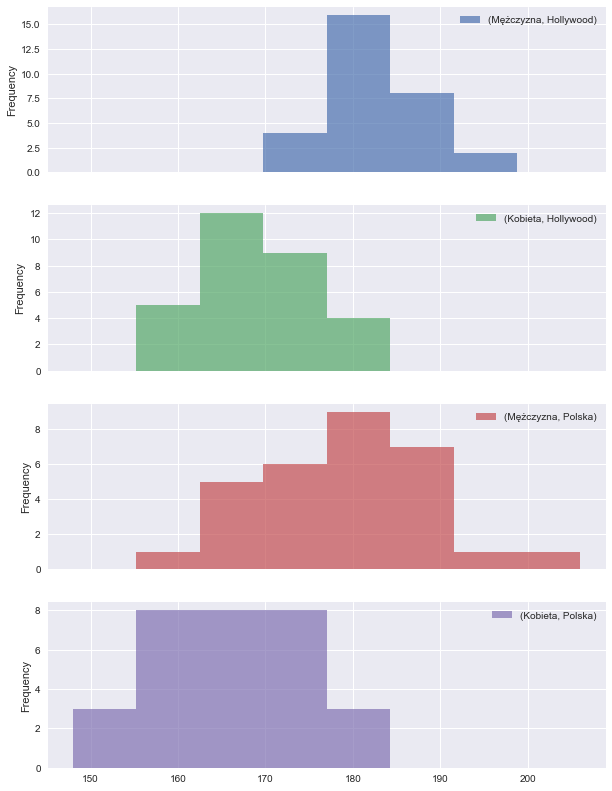

In [228]:
index = list(range(30))*4
x = dane.set_index([index,dane.Płeć, dane.Pochodzenie])['Wzrost'].unstack(['Płeć', 'Pochodzenie'])
x.plot.hist(figsize=(10,14), bins=8, alpha=0.7, subplots=True);
x.head()

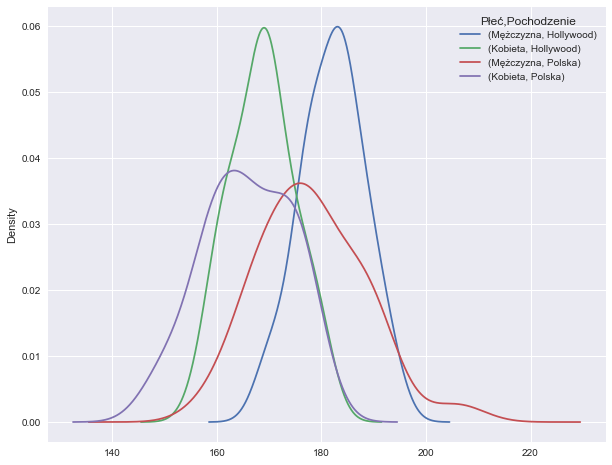

In [227]:
x.plot.kde(figsize=(10,8));

Wyciągnięcie poszczególnych grup jest możliwe poprzez użycie metody <b>.get_group( )</b>.  
Ważne jest by zapamiętać, że przy grupowaniu więcej niż jedną zmienną, musimy też podać tyle samo wartości, co mamy grup. W poniższym przykładzie nie możemy wyłącznie wyświetlić grupy 'Kobieta', ponieważ jest ona podzielona na dwie podgrupy zgodnie z pochodzeniem. Jeśli przekazujemy do get_group więcej niż jeden argument, musimy to zrobić w krotce (okrągłe nawiasy), gdzie kolejność ma znaczenie (jeśli pierwszą zmienną kategoryzacyjną jest 'Płeć', to 'Kobieta' musi się pojawić jako pierwsza w krotce).

In [55]:
dane.groupby(['Płeć','Pochodzenie']).get_group(('Kobieta', 'Polska'))

,Płeć,Pochodzenie,Wzrost
90,Kobieta,Polska,162
91,Kobieta,Polska,178
92,Kobieta,Polska,171
93,Kobieta,Polska,179
94,Kobieta,Polska,174
95,Kobieta,Polska,175
96,Kobieta,Polska,173
97,Kobieta,Polska,165
98,Kobieta,Polska,153
99,Kobieta,Polska,160


Wracając jeszcze na chwilę do możliwości wykonywania operacji na pogrupowanych obiektach.  
Powyżej widzieliśmy zastosowanie metody **.mean( )**, ale dostępne są też różne inne metody, np. sumowanie, wyliczanie odchylenia standardowego, minimalnych i maksymalnych elementów itd. Ich pełną listę można znaleźć w dokumentacji pandas. Poniżej przykład podliczania ilości elementów.

In [56]:
dane.groupby(['Płeć','Pochodzenie']).count()

Wzrost
Płeć      Pochodzenie        
Kobieta   Hollywood        30
          Polska           30
Mężczyzna Hollywood        30
          Polska           30

W tym kontekście użyteczna jest metoda <b>.aggregate( )</b> lub w wersji skróconej <b>.agg( )</b>. Jeśli przekażemy im jeden argument, efekt będzie bardzo podobny do powyższego z tą różnicą, że możemy tu użyć dowolnej funkcji dostępnej w pythonie, która poradzi sobie ze zbiorem danych.
Poniżej widzimy działanie funkcji **max** z pakietu Numpy, która wyświetla największy argument w danym zbiorze.

In [58]:
dane.groupby(['Płeć','Pochodzenie']).aggregate(np.max)

Wzrost
Płeć      Pochodzenie        
Kobieta   Hollywood       180
          Polska          179
Mężczyzna Hollywood       193
          Polska          206

Nie musimy się jednak ograniczać tylko do jednej funkcji, możemy przekazać ich kilka w liście.

In [63]:
dane.groupby(['Płeć','Pochodzenie']).aggregate([np.max, np.min, np.median])

Wzrost            
                        amax amin median
Płeć      Pochodzenie                   
Kobieta   Hollywood      180  157    169
          Polska         179  148    165
Mężczyzna Hollywood      193  170    183
          Polska         206  159    177

<a href='#top' style='float: right; font-size: 13px;'>Do początku</a>

## Podstawowe analizy

Pakiet pandas służy przede wszystkim do organizacji i manipulowania danymi tabularycznymi. Posiada trochę podstawowych funkcji wizualizacyjnych czy statystycznych, jeśli jednak chcemy wykonać nawet podstawowe testy, musimy skorzystać z innych pakietów.  
Jednym z takich pakietów jest SciPy, biblioteka przeznaczona do różnych zastosowań naukowych. My skorzystamy z modułu stats.

In [65]:
import scipy.stats as st

Najbardziej popularnym testem statystycznym jest niewątpliwie **test t**, dzięki któremu możemy oszacować prawdopodobieństwo, z jakim dwie próby pochodzą z tej samej populacji. Nasze dane pozwalają na kilka prostych porównań, dlatego spróbujemy zobaczyć czy możemy uznać, że różne nasze podgrupy są od siebie różne czy nie.

Spróbujmy najpierw zobaczyć czy kobiety i mężczyźni różnią się wzrostem. Zacznijmy od wyboru odpowiednich grup.

In [99]:
test = pd.DataFrame({'mezczyzni':dane.loc[dane['Płeć']=='Mężczyzna','Wzrost'].values})
test['kobiety'] = dane.loc[dane['Płeć']=='Kobieta','Wzrost'].values

In [100]:
test

,mezczyzni,kobiety
0,174,168
1,170,157
2,177,160
3,177,177
4,178,169
5,189,174
6,183,175
7,183,168
8,193,169
9,182,171


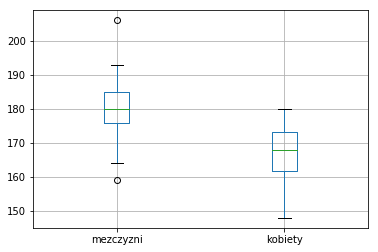

In [101]:
test.boxplot()

Odpowiedni dla naszej sytuacji jest test t dla próbek indywidualnych. Właściwa funkcja użyta jest poniżej.  
Jedyne, co musimy jej przekazać to zmienne zawierające poszczególne grupy, które chcemy porównać.

In [102]:
st.ttest_ind(test.mezczyzni,test.kobiety)

Ttest_indResult(statistic=8.8412658187732376, pvalue=1.0853094112898635e-14)

In [103]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [104]:
formula = 'Wzrost ~ C(Płeć) + C(Pochodzenie) + C(Płeć):C(Pochodzenie)'
model = ols(formula, dane).fit()
aov_table = anova_lm(model, typ=2)

In [105]:
print(aov_table)

                             sum_sq     df          F        PR(>F)
C(Płeć)                 4953.675000    1.0  80.787258  5.542497e-15
C(Pochodzenie)           357.075000    1.0   5.823376  1.738007e-02
C(Płeć):C(Pochodzenie)     8.008333    1.0   0.130604  7.184637e-01
Residual                7112.833333  116.0        NaN           NaN


In [108]:
import statsmodels.api as sm

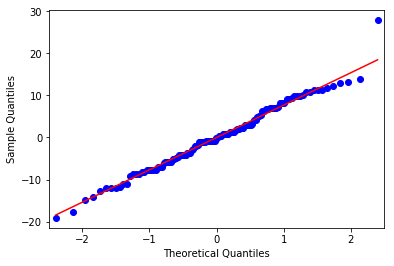

In [113]:
res = model.resid
fig = sm.qqplot(res, line='s')

<a href='#top' style='float: right; font-size: 13px;'>Do początku</a>

## Materiały do dalszej nauki

Pakiet pandas dysponuje dużo większymi możliwościami, niż przedstawione tutaj. Poniżej zebrałem kilka zasobów internetowych, które są dla mnie najbardziej przydatne przy pracy z tym pakietem.

Najważniejszym źródłem informacji zawsze jest <a href="http://pandas.pydata.org/pandas-docs/stable/index.html">**Oficjalna dokumentacja**</a>, a pakiet pandas jest bardzo dobrze opisany.  
Szczególnie przydatny jest szybki przegląd najważniejszych funkcji pandas <a href="http://pandas.pydata.org/pandas-docs/stable/10min.html">**na tej podstronie**</a>. W innych zakładkach najdziecie też bardziej rozbudowane przeglądy, tutoriale, zbiory gotowych "przepisów" na osiągnięcie konkretnych, bardziej złożonych rezultatów.

Podstawowe informacje o tym, jak wykonywać bazowe operacje można mieć zawsze pod ręką w postaci tzw. cheatsheet'a.  
Tutaj znajdziecie <a href="https://github.com/pandas-dev/pandas/raw/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf">**ten oficjalny**</a>.  
Tutaj natomiast wersja przygotowana przez <a href="https://assets.datacamp.com/blog_assets/PandasPythonForDataScience.pdf">**portal DataCamp**</a>.

### Filmy tutorialowe

Osobiście jestem wielkim fanem tutoriali w formie wideo, których sporo można znaleźć na Youtube. Z każdym rokiem pojawia się ich coraz więcej, bo bardzo często są elementem konrefencji poświęconych Pythonowi czy analizie danych. Bez problemu można je wyszukać w samym serwisie, poniżej jednak wrzucę Wam kilka linków do moich ulubionych.

Bardzo dobrze prowadzony <a href="https://youtu.be/5JnMutdy6Fw">**tutorial Brandona Rhodesa**</a> z 2015 roku. Z tego powodu nie ma w nim nowych funkcji, ale podstawowe operacje są ciągle aktualne i dokładnie wytłumaczone. W opisie nagrania są linki do materiałów użytych w tutorialu (tak będzie też dla prawie wszystkich materiałów wideo poniżej).

<a href="https://youtu.be/6ohWS7J1hVA">**Tutorial Johnatana Rochera**</a> z 2016 roku ma trochę szybsze tempo i porusza więcej kwestii, niemniej ciągle jest skierowany do początkujących, więc nie powinniście mieć problemu ze śledzeniem akcji.

Najnowszy <a href="https://youtu.be/dye7rDktJ2E">**tutorial Daniela Chena**</a> jest trochę krótszy niż poprzednie i odwołuje się do prawie najnowszej wersji pandas.

Dla osób, które będą się czuć w pandas bardziej swobodnie, warty obejrzenia jest <a href="https://youtu.be/7vuO9QXDN50">**tutorial Toma Augspurgera**</a>. Choć zaczyna się dość podstawowo, poziom skomplikowania dość szybko rośnie, dzięki czemu można zobaczyć bardziej zaawansowane rzeczy, które można zrobić w tym pakiecie.

### Tutoriale pisane

Podobnie ma się sytuacja z materiałami pisanymi. Pojawia się coraz więcej przewodników po pandas, dlatego też zostawię tutaj tylko kilka przykładów, z których albo korzystałem sam, albo wydały mi się dobre na początek przygody z tym pakietem.

Dwuczęściowy tutorial autorstwa Vika Paruchuri:  
<a href="https://www.dataquest.io/blog/pandas-python-tutorial/">**Część 1**</a>,
<a href="https://www.dataquest.io/blog/pandas-tutorial-python-2/">**Część 2**</a>.

Bardzo rozbudowany <a href="http://nbviewer.jupyter.org/github/fonnesbeck/Bios8366/tree/master/notebooks/">**tutorial Chrisa Fonnesbecka**</a> powiązany z kursem zaawansowanego przetwarzania danych w pythonie. Notatniki z sekcji drugiej dotyczą różnych aspektów obsługi pakietu pandas i zawierają sporo materiałów wykraczających poza treści omawiane tutaj. 

Całkiem rozbudowany <a href="http://tomaugspurger.github.io/modern-1.html">**tutorial**</a> wspomnianego wcześniej Toma Augspurgera. Tutaj również znajdziecie trochę bardziej zaawansowanych materiałów.

<a href='#top' style='float: right; font-size: 13px;'>Do początku</a>

In [64]:
from IPython.core.display import HTML
from urllib.request import urlopen
HTML(urlopen("https://raw.githubusercontent.com/mkoculak/hello_world/nowa/ipython.css").read().decode("utf-8"))